# Tugas 1 Algoritma dan Komputasi

Nama: Bakti Amirul Jabar
NIM: 25/569253/SPA/01134

## Data Preparation

In [35]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [36]:
#Import dataset
url = f"https://docs.google.com/spreadsheets/d/1yhi8ASebpmljJ3NpYQ7NmxlWLmhGOI6W/export?format=csv"

df = pd.read_csv(url, header=None)

In [37]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [38]:
print(df.shape)

(100, 5)


In [39]:
#ubah kelas iris sentosa=0, iris-Iris-versicolor=1
df[4] = df[4].map({'Iris-setosa': 0, 'Iris-versicolor': 1})
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [40]:
#Split train test kemudian save data untuk perbandingan di excel dengan stratisfy agar datanya seimbang

In [41]:
X = df.drop(columns=[4]).values
y = df[4].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [42]:
train_df = pd.DataFrame(np.column_stack((X_train, y_train)), columns=list(df.columns[:-1]) + [4])
test_df = pd.DataFrame(np.column_stack((X_test, y_test)), columns=list(df.columns[:-1]) + [4])

train_df.to_excel("train.xlsx", index=False, header=False)
test_df.to_excel("test.xlsx", index=False, header=False)

In [43]:
# Tambahkan feature yang isinya 1 untuk bias di awal
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test  = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

In [44]:
X_train

array([[1. , 5.7, 4.4, 1.5, 0.4],
       [1. , 6.9, 3.1, 4.9, 1.5],
       [1. , 5. , 2. , 3.5, 1. ],
       [1. , 5.6, 3. , 4.5, 1.5],
       [1. , 6.2, 2.2, 4.5, 1.5],
       [1. , 4.6, 3.4, 1.4, 0.3],
       [1. , 5.4, 3.4, 1.5, 0.4],
       [1. , 5.2, 2.7, 3.9, 1.4],
       [1. , 5.1, 3.8, 1.6, 0.2],
       [1. , 5.7, 2.8, 4.1, 1.3],
       [1. , 4.9, 3.1, 1.5, 0.1],
       [1. , 5. , 3.2, 1.2, 0.2],
       [1. , 6.7, 3.1, 4.7, 1.5],
       [1. , 6. , 2.9, 4.5, 1.5],
       [1. , 5.5, 2.5, 4. , 1.3],
       [1. , 4.5, 2.3, 1.3, 0.3],
       [1. , 5.5, 2.4, 3.8, 1.1],
       [1. , 4.7, 3.2, 1.3, 0.2],
       [1. , 4.8, 3. , 1.4, 0.1],
       [1. , 6.4, 2.9, 4.3, 1.3],
       [1. , 5.9, 3. , 4.2, 1.5],
       [1. , 5.3, 3.7, 1.5, 0.2],
       [1. , 4.9, 3.1, 1.5, 0.1],
       [1. , 4.7, 3.2, 1.6, 0.2],
       [1. , 5.1, 3.8, 1.5, 0.3],
       [1. , 5.1, 3.4, 1.5, 0.2],
       [1. , 5.9, 3.2, 4.8, 1.8],
       [1. , 4.6, 3.2, 1.4, 0.2],
       [1. , 6.1, 2.8, 4. , 1.3],
       [1. , 5

Di cek data sudah sesuai dan siap untuk modelling

## Modelling

Akan dilakukan modelling dengan 5 epoch, kemudian buat grafik loss dan akurasi untuk train dan test. Dengan inisasi bobot dari w dan bias adalah 0.5 dan lr=0.1

In [45]:
#Definisikan fungsi yang dibutuhkan
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_probs(X, W):
    return sigmoid(np.dot(X, W))

def predict_labels(X, W):
    return (predict_probs(X, W) >= 0.5).astype(int)

def compute_loss(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.sum((y_true - y_pred) ** 2)

In [46]:
#Inisiasi Awal
W = np.ones(5) * 0.5 #Ini termasuk untukn  bias
lr=0.1 #learning rate
n_data=X_train.shape[0] #untuk membagi saat akurasi

In [47]:
# Buat untuk simpan akurasi dan loss
train_losses, val_losses = [], []
train_accs, val_accs = [], []

### Epoch 1

In [48]:
train_loss=0
train_acc=0
for xi, yi in zip(X_train, y_train):
    y_prob = predict_probs(xi, W)
    error = y_prob - yi
    train_loss=train_loss+error*error

    if(predict_labels(xi, W)==yi):
      train_acc=train_acc+1/n_data


    dW = 2*error*(1-y_prob)*y_prob*xi
    W = W - lr * dW


W #setelah training

array([ 0.31621117, -0.38385646, -0.14691557,  0.35053835,  0.50013182])

In [49]:
train_loss

np.float64(35.33571051326776)

In [50]:
train_acc

0.5125000000000002

In [51]:
# evaluasi validasi setelah weight di update
y_probs_test = predict_probs(X_test, W)
y_preds_test = (y_probs_test >= 0.5).astype(int)
val_loss = compute_loss(y_test, y_probs_test)
val_acc = np.mean(y_preds_test == y_test)

In [52]:
val_acc

np.float64(0.55)

In [53]:
val_loss

np.float64(3.3843863051790724)

In [54]:
#Simpan data setiap Epoch
train_losses.append(train_loss)
train_accs.append(train_acc)
val_losses.append(val_loss)
val_accs.append(val_acc)

### Epoch 2

In [55]:
train_loss=0
train_acc=0
for xi, yi in zip(X_train, y_train):
    y_prob = predict_probs(xi, W)
    error = y_prob - yi
    train_loss=train_loss+error*error

    if(predict_labels(xi, W)==yi):
      train_acc=train_acc+1/n_data


    dW = 2*error*(1-y_prob)*y_prob*xi
    W = W - lr * dW


W #setelah training

array([ 0.24395298, -0.42674875, -0.53749166,  1.03802768,  0.79586933])

In [56]:
# evaluasi validasi setelah weight di update
y_probs_test = predict_probs(X_test, W)
y_preds_test = (y_probs_test >= 0.5).astype(int)
val_loss = compute_loss(y_test, y_probs_test)
val_acc = np.mean(y_preds_test == y_test)

In [57]:
#Simpan data setiap Epoch
train_losses.append(train_loss)
train_accs.append(train_acc)
val_losses.append(val_loss)
val_accs.append(val_acc)

### Epoch 3

In [58]:
train_loss=0
train_acc=0
for xi, yi in zip(X_train, y_train):
    y_prob = predict_probs(xi, W)
    error = y_prob - yi
    train_loss=train_loss+error*error

    if(predict_labels(xi, W)==yi):
      train_acc=train_acc+1/n_data


    dW = 2*error*(1-y_prob)*y_prob*xi
    W = W - lr * dW


W #setelah training

array([ 0.21972066, -0.44434926, -0.6768766 ,  1.27435193,  0.89795973])

In [59]:
# evaluasi validasi setelah weight di update
y_probs_test = predict_probs(X_test, W)
y_preds_test = (y_probs_test >= 0.5).astype(int)
val_loss = compute_loss(y_test, y_probs_test)
val_acc = np.mean(y_preds_test == y_test)

In [60]:
#Simpan data setiap Epoch
train_losses.append(train_loss)
train_accs.append(train_acc)
val_losses.append(val_loss)
val_accs.append(val_acc)

### Epoch 4

In [61]:
train_loss=0
train_acc=0
for xi, yi in zip(X_train, y_train):
    y_prob = predict_probs(xi, W)
    error = y_prob - yi
    train_loss=train_loss+error*error

    if(predict_labels(xi, W)==yi):
      train_acc=train_acc+1/n_data


    dW = 2*error*(1-y_prob)*y_prob*xi
    W = W - lr * dW


W #setelah training

array([ 0.20446001, -0.45861294, -0.76341379,  1.41553874,  0.95986434])

In [62]:
# evaluasi validasi setelah weight di update
y_probs_test = predict_probs(X_test, W)
y_preds_test = (y_probs_test >= 0.5).astype(int)
val_loss = compute_loss(y_test, y_probs_test)
val_acc = np.mean(y_preds_test == y_test)

In [63]:
#Simpan data setiap Epoch
train_losses.append(train_loss)
train_accs.append(train_acc)
val_losses.append(val_loss)
val_accs.append(val_acc)

### Epoch 5

In [64]:
train_loss=0
train_acc=0
for xi, yi in zip(X_train, y_train):
    y_prob = predict_probs(xi, W)
    error = y_prob - yi
    train_loss=train_loss+error*error

    if(predict_labels(xi, W)==yi):
      train_acc=train_acc+1/n_data


    dW = 2*error*(1-y_prob)*y_prob*xi
    W = W - lr * dW


W #setelah training

array([ 0.19309877, -0.47083788, -0.82670718,  1.51624651,  1.00459276])

In [65]:
# evaluasi validasi setelah weight di update
y_probs_test = predict_probs(X_test, W)
y_preds_test = (y_probs_test >= 0.5).astype(int)
val_loss = compute_loss(y_test, y_probs_test)
val_acc = np.mean(y_preds_test == y_test)

In [66]:
#Simpan data setiap Epoch
train_losses.append(train_loss)
train_accs.append(train_acc)
val_losses.append(val_loss)
val_accs.append(val_acc)

## Visualisasi dan Train Loss

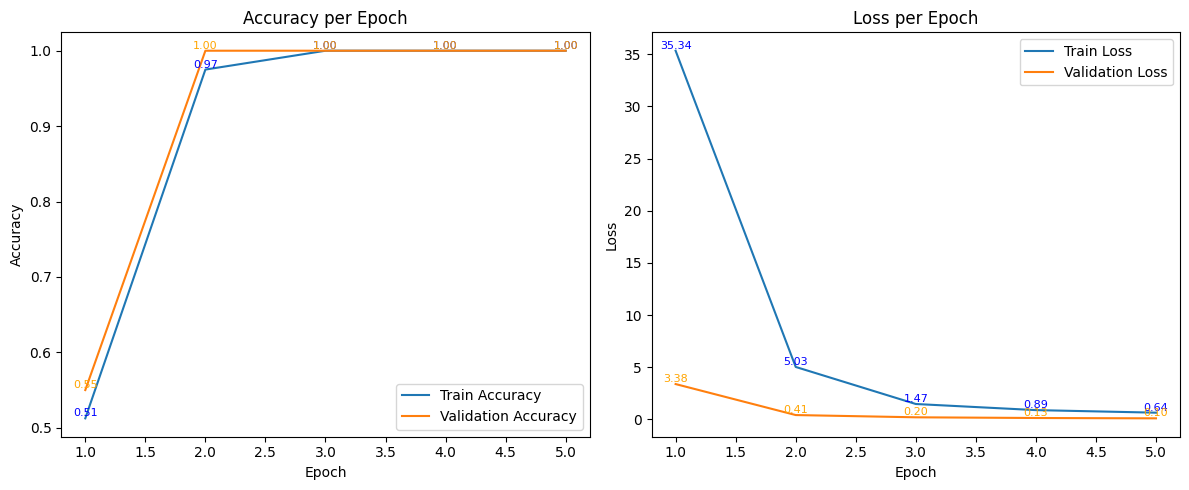

In [67]:
epochs=5
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(range(1, epochs+1), train_accs, label="Train Accuracy")
plt.plot(range(1, epochs+1), val_accs, label="Validation Accuracy")

for i in range(5):
    plt.text(i+1, train_accs[i], f"{train_accs[i]:.2f}", ha='center', va='bottom', fontsize=8, color="blue")
    plt.text(i+1, val_accs[i], f"{val_accs[i]:.2f}", ha='center', va='bottom', fontsize=8, color="orange")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy per Epoch")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, epochs+1), train_losses, label="Train Loss")
plt.plot(range(1, epochs+1), val_losses, label="Validation Loss")

for i in range(5):
    plt.text(i+1, train_losses[i], f"{train_losses[i]:.2f}", ha='center', va='bottom', fontsize=8, color="blue")
    plt.text(i+1, val_losses[i], f"{val_losses[i]:.2f}", ha='center', va='bottom', fontsize=8, color="orange")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss per Epoch")
plt.legend()

plt.tight_layout()
plt.show()